<a href="https://colab.research.google.com/github/minhtri1610/deeplearning/blob/main/less2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
min(y_train)

0

In [7]:
max(y_train)

9

Ánh xạ dữ liệu

In [8]:
labels = {0: "T-shirt/top", 1: "Trouser", 2 : "Pullover", 3:"Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

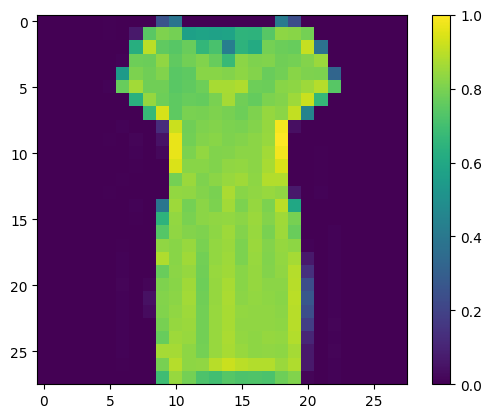

In [9]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()

Train Model

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

Khởi tạo neural network

In [11]:
model = Sequential()

Thêm lớp đầu vào có kích cỡ 28x28
Flatten ở đây có nhiệm vụ duỗi ảnh từ ma trận (28 * 28) thành (784 * 1)

In [12]:
model.add(Flatten(input_shape = (28, 28)))

Thêm một lớp ẩn có cỡ (28 * 1). Hàm phi tuyến ReLU

In [13]:
model.add(Dense(28, activation="relu"))

Thêm lớp softmax để thu về đầu ra là 10 lóp như mong muốn

In [14]:
model.add(Dense(10, activation="softmax"))

Kiểm tra lại model trước khi train

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                                                 
Total params: 22270 (86.99 KB)
Trainable params: 22270 (86.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Loss function: Hàm mất mát thể hiện độ sai lệch dự đoán model với nhãn thực tế

In [17]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])


Tiến hành train model trong 10 vòng lặp để tối ưu hoá loss function

In [18]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5595 - accuracy: 0.8069
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8533
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3886 - accuracy: 0.8623
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8694
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3526 - accuracy: 0.8753
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3432 - accuracy: 0.8769
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3308 - accuracy: 0.8818
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3224 - accuracy: 0.8839
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8865
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.30

Kiểm tra độ chính xác hiện tại

In [19]:
from sklearn.metrics import accuracy_score

In [22]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
y_predicted_classes = np.argmax(y_predicted, axis=1)

In [25]:
accuracy_score(y_predicted_classes, y_test)

0.8691

Quá trình inference (Truyền data không được train vào mô hình)

In [26]:
x_inference = x_test[0]

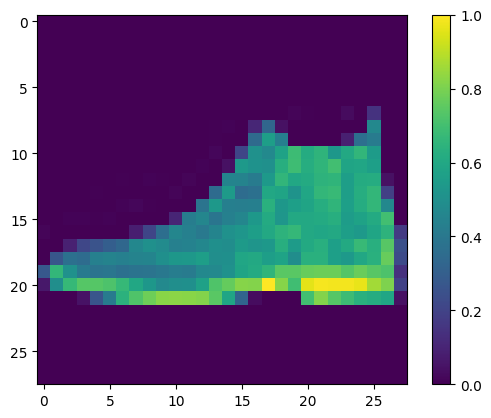

In [27]:
plt.figure()
plt.imshow(x_inference)
plt.colorbar()

In [29]:
y_predicted = model.predict(np.array([x_inference]))

1/1 [==============================] - 0s 22ms/step


In [31]:
y_predicted_classes = np.argmax(y_predicted, axis=1)
y_predicted_classes[0]

9

In [32]:
labels[y_predicted_classes[0]]

'Ankle boot'